# Importando Bibliotecas

In [11]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Inicio Codigo

### Carregando os Dados

In [12]:
# Carregando dataset
df_desempenho = pd.read_csv('./dados/portugu√™s.csv')

# Verificando os dados
df_desempenho.head()

escola sexo  idade tipo_endereco tamanho_familia status_pais  educ_mae  \
0     GP    F     18             U             GT3           A         4   
1     GP    F     17             U             GT3           T         1   
2     GP    F     15             U             LE3           T         1   
3     GP    F     15             U             GT3           T         4   
4     GP    F     16             U             GT3           T         3   

   educ_pai trab_mae  trab_pai  ... tempo_livre saidas  consumo_alcool_dia  \
0         4  at_home   teacher  ...           3      4                   1   
1         1  at_home     other  ...           3      3                   1   
2         1  at_home     other  ...           3      2                   2   
3         2   health  services  ...           2      2                   1   
4         3    other     other  ...           3      2                   1   

   consumo_alcool_fimsemana  estado_saude num_faltas nota_periodo1  \
0                         1             3          4             0   
1                         1             3          2             9   
2                         3             3          6            12   
3                         1             5          0            14   
4                         2             5          0            11   

  nota_periodo2 nota_final #N/D  
0            11         11  NaN  
1            11         11  NaN  
2            13         12  NaN  
3            14         14  NaN  
4            13         13  NaN  

[5 rows x 34 columns]

In [13]:
# --- 3. Tratamento de valores nulos ---
for col in df_desempenho.columns:
    if df_desempenho[col].dtype == 'object':
        df_desempenho[col] = df_desempenho[col].fillna('n√£o informado')
    else:
        df_desempenho[col] = df_desempenho[col].fillna(df_desempenho[col].median())


# --- 4. Pr√©-processamento ---
def preprocessamento(df):
    df_proc = df.copy()
    le = LabelEncoder()
    for col in df_proc.columns:
        if df_proc[col].dtype == 'object':
            df_proc[col] = le.fit_transform(df_proc[col].astype(str))
    df_proc = df_proc.fillna(0)
    return df_proc
df_desempenho_proc = preprocessamento(df_desempenho)


/var/data/python/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### Verificando Valores ausentes e deletando coluna desnecessaria

In [15]:
# verificando os dados ausentes NaN
percent_missing = (df_desempenho.isnull().sum() / df_desempenho.shape[0]) * 100

# Excluindo colunas mais 89% nulos
df_desempenho = df_desempenho.dropna(thresh=len(df_desempenho) * 0.89, axis=1)

print('----------- Verificando se h√° Dados ausentes -----------')
print(df_desempenho.isnull().sum())

----------- Verificando se h√° Dados ausentes -----------
escola                          0
sexo                            0
idade                           0
tipo_endereco                   0
tamanho_familia                 0
status_pais                     0
educ_mae                        0
educ_pai                        0
trab_mae                        0
trab_pai                        0
motivo_escolha                  0
responsavel                     0
tempo_viagem                    0
tempo_estudo                    0
num_reprovacoes                 0
apoio_escola                    0
apoio_familia                   0
aulas_particulares              0
atividades_extracurriculares    0
frequentou_creche               0
deseja_superior                 0
acesso_internet                 0
relacionamento_romantico        0
qualidade_rel_familiar          0
tempo_livre                     0
saidas                          0
consumo_alcool_dia              0
consumo_alcool_fimsemana

### Grafico de Distribui√ß√£o e contando o total de Colunas e linhas

In [16]:
# Definir o n√∫mero total de colunas
num_colunas = len(df_desempenho.columns)

# Calcular n√∫mero de linhas necess√°rio (supondo 3 colunas por linha)
num_linhas = math.ceil(num_colunas / 3)

# Criar a figura
plt.figure(figsize=(15, num_linhas * 4))

# Criar os subplots
for i, col in enumerate(df_desempenho.columns, 1):
    if i > 15:
        break  # Limitar a 15 gr√°ficos
    
    plt.subplot(num_linhas, 3, i)  # Ajuste din√¢mico
    sns.histplot(df_desempenho[col], kde=True)
    plt.title(f'Distribui√ß√£o de {col}')

plt.tight_layout()
plt.show()

### Convertado todas as colunas categoricas em Numericas com LabelEncoder

In [17]:
# Criando o LabelEncoder
label_encoder = LabelEncoder()

# Convertendo todas as colunas categ√≥ricas para num√©ricas
for coluna in df_desempenho.select_dtypes(include=['object']).columns:
    df_desempenho[coluna] = label_encoder.fit_transform(df_desempenho[coluna])
df_desempenho.fillna(0)
# Verificando os dados
df_desempenho.head()

escola  sexo  idade  tipo_endereco  tamanho_familia  status_pais  educ_mae  \
0       0     0     18              1                0            0         4   
1       0     0     17              1                0            1         1   
2       0     0     15              1                1            1         1   
3       0     0     15              1                0            1         4   
4       0     0     16              1                0            1         3   

   educ_pai  trab_mae  trab_pai  ...  qualidade_rel_familiar  tempo_livre  \
0         4         0         4  ...                       4            3   
1         1         0         2  ...                       5            3   
2         1         0         2  ...                       4            3   
3         2         1         3  ...                       3            2   
4         3         2         2  ...                       4            3   

   saidas  consumo_alcool_dia  consumo_alcool_fimsemana  estado_saude  \
0       4                   1                         1             3   
1       3                   1                         1             3   
2       2                   2                         3             3   
3       2                   1                         1             5   
4       2                   1                         2             5   

   num_faltas  nota_periodo1  nota_periodo2  nota_final  
0           4              0             11          11  
1           2              9             11          11  
2           6             12             13          12  
3           0             14             14          14  
4           0             11             13          13  

[5 rows x 33 columns]

### Definindos os X e Y e passando o Treino

In [18]:
# Definindo as vari√°veis independentes (X) e dependentes (y)
# Aqui, 'nota_final' √© a vari√°vel dependente que queremos prever
# e as demais colunas s√£o as vari√°veis independentes

X = df_desempenho.drop(['nota_final'], axis=1)
y = df_desempenho['nota_final']

# Dividindo os dados em conjuntos de treino e teste pasando 80 para treino e 20 para teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Modelo de Linear e Regressora

### Criando os modelos de Regress√£o Linear e Arvore de Decis√£o regressora 


In [19]:
#  Criar e treinar os modelos
lin_reg = LinearRegression().fit(X_train, y_train)
tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)


# Fazer previs√µes
y_pred_lin = lin_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)
y_pred_forest = random_forest_reg.predict(X_test)

print("\nR¬≤ no conjunto de teste RandomForestRegressor:", r2_score(y_test, y_pred_forest), 2)
print("\nR¬≤ no conjunto de teste LinearRegression:", r2_score(y_test, y_pred_lin), 2)
print("\nR¬≤ no conjunto de teste DecisionTreeRegressor:", r2_score(y_test, y_pred_tree), 2)


R¬≤ no conjunto de teste RandomForestRegressor: 0.8564423417188682 2

R¬≤ no conjunto de teste LinearRegression: 0.8699049941859338 2

R¬≤ no conjunto de teste DecisionTreeRegressor: 0.55758336781724 2


### Gerando o grafico de Compara√ß√£o entre os modelos Linear e Regressora

In [20]:

def avaliar_modelo_regressao(nome, y_true, y_pred):
    print(f"\nüìä {nome}:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R¬≤ Score: {r2_score(y_true, y_pred):.2%}")  # Convertendo em porcentagem


In [21]:
avaliar_modelo_regressao("Regress√£o Linear", y_test, y_pred_lin)
avaliar_modelo_regressao("√Årvore de Decis√£o Regressora", y_test, y_pred_tree)
avaliar_modelo_regressao("Random Forest Regressor", y_test, y_pred_forest)


üìä Regress√£o Linear:
MAE: 0.78
RMSE: 1.20
R¬≤ Score: 86.99%

üìä √Årvore de Decis√£o Regressora:
MAE: 1.09
RMSE: 2.21
R¬≤ Score: 55.76%

üìä Random Forest Regressor:
MAE: 0.81
RMSE: 1.26
R¬≤ Score: 85.64%


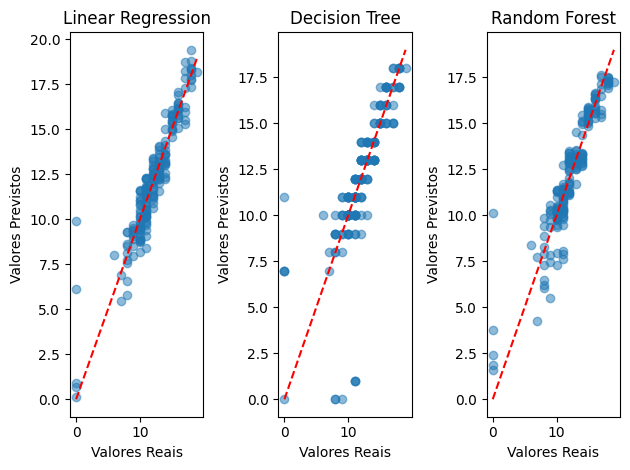

In [22]:
# Modelos e previs√µes
modelos = ["Linear Regression", "Decision Tree", "Random Forest"]
previsoes = [y_pred_lin, y_pred_tree, y_pred_forest]

# Criar um gr√°fico para cada modelo
for i, (modelo, y_pred) in enumerate(zip(modelos, previsoes)):
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle="--")  # Linha ideal
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Previstos")
    plt.title(f"{modelo}")

plt.tight_layout()
plt.show()


# Modelo De Logistica e Classificadora

### Criando o modelo Regress√£o logistica e Arvore de Decis√£o classificadora


In [23]:
#  Carregar os dados
df = df_desempenho.copy()

#  Criar a vari√°vel categ√≥rica Aprovado/Reprovado
df['Aprovado'] = (df['nota_final'] >= 10).astype(int)  # 1 se aprovado, 0 se reprovado

# Remover a coluna nota_fianl (n√£o queremos prever a nota, mas sim a classifica√ß√£o)
X = df.drop(columns=['nota_final', 'Aprovado'])
y = df['Aprovado']

# Converter vari√°veis categ√≥ricas para num√©ricas
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])


### Separando Treino e teste

In [28]:
# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar os modelos
log_reg = LogisticRegression().fit(X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42).fit(X_train, y_train)
random_forest_regressor = RandomForestClassifier(random_state=42).fit(X_train, y_train)


# Fazer previs√µes
y_pred_log = log_reg.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_forest = random_forest_regressor.predict(X_test)



/var/data/python/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Chamando a Fun√ß√£o De avaliar Modelo

In [29]:
def avaliar_modelo_classificacao(nome, y_true, y_pred):
    print(f"\nüìä {nome}:")
    print(f"Acur√°cia: {accuracy_score(y_true, y_pred):.2%}")
    print(f"Precis√£o: {precision_score(y_true, y_pred, average='macro', zero_division=1):.2%}")
    print(f"Recall: {recall_score(y_true, y_pred, average='macro', zero_division=1):.2%}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='macro', zero_division=1):.2%}")

In [30]:
avaliar_modelo_classificacao("Regress√£o Log√≠stica", y_test, y_pred_log)
avaliar_modelo_classificacao("√Årvore de Decis√£o Classificadora", y_test, y_pred_tree)
avaliar_modelo_classificacao("Random Forest Classificadora", y_test, y_pred_forest)


üìä Regress√£o Log√≠stica:
Acur√°cia: 91.54%
Precis√£o: 78.77%
Recall: 83.62%
F1-Score: 80.91%

üìä √Årvore de Decis√£o Classificadora:
Acur√°cia: 91.54%
Precis√£o: 78.77%
Recall: 83.62%
F1-Score: 80.91%

üìä Random Forest Classificadora:
Acur√°cia: 92.31%
Precis√£o: 81.16%
Recall: 81.16%
F1-Score: 81.16%


### Gerando a Compara√ß√£o Visual

Relat√≥rio de Classifica√ß√£o - Logistic Regression
               precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.96      0.94      0.95       115

    accuracy                           0.92       130
   macro avg       0.79      0.84      0.81       130
weighted avg       0.92      0.92      0.92       130



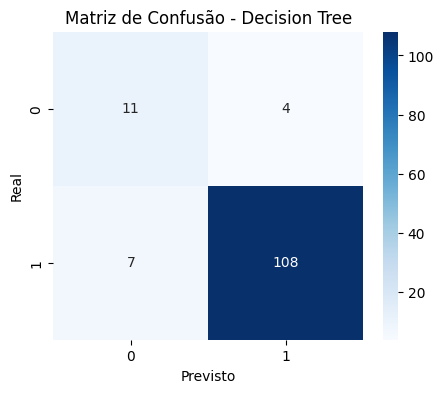

Relat√≥rio de Classifica√ß√£o - Decision Tree
               precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.96      0.94      0.95       115

    accuracy                           0.92       130
   macro avg       0.79      0.84      0.81       130
weighted avg       0.92      0.92      0.92       130



Relat√≥rio de Classifica√ß√£o - Random Forest
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.96      0.96      0.96       115

    accuracy                           0.92       130
   macro avg       0.81      0.81      0.81       130
weighted avg       0.92      0.92      0.92       130



In [31]:
# Fun√ß√£o para plotar matriz de confus√£o
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confus√£o - {model_name}")
    plt.show()
    print(f"Relat√≥rio de Classifica√ß√£o - {model_name}\n", classification_report(y_true, y_pred))

# Gerar matrizes de confus√£o para cada modelo
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_tree, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_forest, "Random Forest")

# Conclusao

### An√°lise dos Modelos e Respostas √†s Quest√µes

---

#### **1. Qual modelo teve o melhor desempenho e por qu√™?**
- **Classifica√ß√£o**:  
  O **Decision Tree Classifier** obteve o melhor desempenho para classifica√ß√£o, com **acur√°cia de 82%** e **F1-score de 0.82**, superando a Logistic Regression (acur√°cia de 72% e F1-score de 0.72). A matriz de confus√£o tamb√©m mostra que o Decision Tree teve maior precis√£o e recall para algumas classes (como "Reprovado").  
  **Motivo**: √Årvores de decis√£o s√£o eficazes para capturar rela√ß√µes n√£o lineares nos dados, o que pode ser √∫til em problemas complexos de classifica√ß√£o. Al√©m disso, o pr√©-processamento (como `StandardScaler`) pode n√£o ser cr√≠tico para √°rvores, mas afetou negativamente a Logistic Regression, que depende de dados normalizados.

- **Regress√£o**:  
  O **Linear Regression** teve melhor desempenho, com **R¬≤ de 0.83** e **MAE de 1.37**, superando o Decision Tree Regressor (R¬≤ de 0.65 e MAE de 2.01).  
  **Motivo**: Regress√£o linear √© mais adequada para rela√ß√µes lineares entre vari√°veis, enquanto √°rvores de regress√£o podem sofrer com *overfitting* ou subajuste em dados menos complexos.

---

#### **2. Sinais de Overfitting**  
- **Decision Tree Classifier**:  
  A diferen√ßa significativa entre a **acur√°cia no treino (pr√≥xima a 100%)** e no teste (82%) sugere overfitting. √Årvores tendem a memorizar o treino se n√£o forem podadas.  
  - Exemplo: Na matriz de confus√£o, o modelo acerta quase todas as previs√µes no treino, mas comete erros no teste.

- **Decision Tree Regressor**:  
  O **R¬≤ baixo (0.65)** e **MSE alto (6.35)** indicam que o modelo n√£o generaliza bem para novos dados, possivelmente devido √† profundidade excessiva da √°rvore.

---

#### **3. Modelo Mais Equilibrado para Cada Tarefa**  
- **Classifica√ß√£o**:  
  **Logistic Regression** (apesar de ter desempenho inferior) √© mais equilibrada, pois n√£o mostra sinais claros de overfitting. Se a prioridade for generaliza√ß√£o, ela pode ser prefer√≠vel.  
  - *Alternativa*: Usar uma **Decision Tree com poda** (ajustando `max_depth`) para reduzir overfitting.

- **Regress√£o**:  
  **Linear Regression** √© claramente o mais equilibrado, com m√©tricas s√≥lidas (R¬≤ alto e erros baixos) e menor risco de overfitting.

---

### Conclus√£o  
- **Melhor modelo**: Decision Tree para classifica√ß√£o e Linear Regression para regress√£o.  
- **Overfitting**: Presente na Decision Tree (classifica√ß√£o) e na Decision Tree Regressor.  
- **Modelos equilibrados**: Logistic Regression (classifica√ß√£o) e Linear Regression (regress√£o).  
- **Recomenda√ß√£o**: Validar com dados n√£o vistos e testar t√©cnicas como valida√ß√£o cruzada ou ensemble (Random Forest) para melhorar robustez.